# CDC Diabetes Health Indicators
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [1]:
# Imports
import pandas as pd
import numpy as np
import joblib

# Plot Imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklern Imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import roc_auc_score, classification_report

In [2]:
# Import Dataset
df = pd.read_csv('./datasets/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
print(df.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

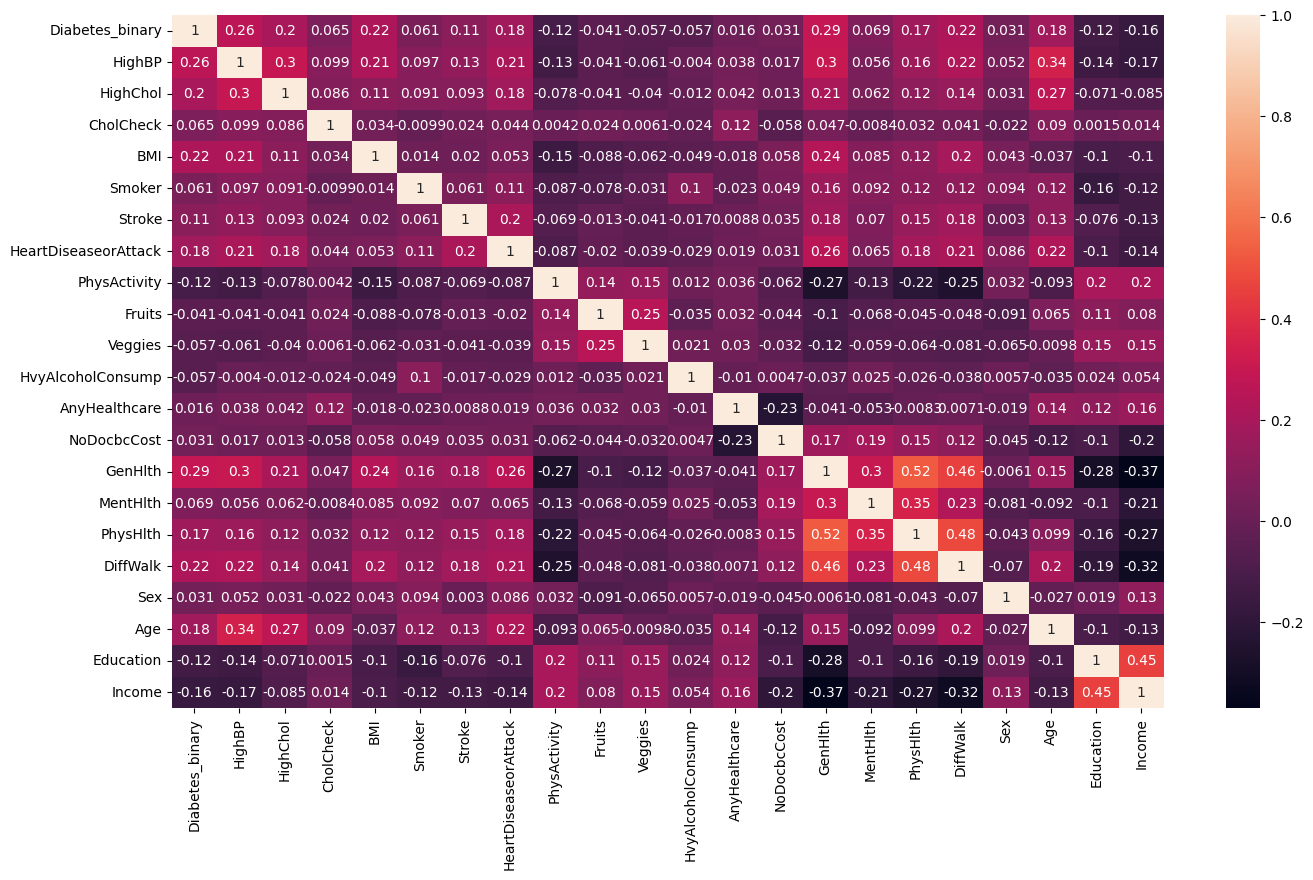

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

In [8]:
correlations = df.corr(numeric_only=True)['Diabetes_binary'].sort_values(ascending=False)
print(correlations)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [9]:
# Data Preprocessing
colsToDrop = ['NoDocbcCost', 'Sex', 'AnyHealthcare', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Income']
df.drop(colsToDrop, axis=1, inplace=True)

In [10]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,11.0


In [11]:
# Split Dataset
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"🔹 {name}: ROC AUC = {auc:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

C:\Users\jeffr\Projects\Environments\jupyternotebook-env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Logistic Regression: ROC AUC = 0.821
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.87      0.83     50736

----------------------------------------
🔹 Random Forest: ROC AUC = 0.773
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     43739
         1.0       0.41      0.21      0.28      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736

----------------------------------------
🔹 KNN: ROC AUC = 0.716
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     43739
         1.0       0.40      0.20      0.27      6997

    a

C:\Users\jeffr\Projects\Environments\jupyternotebook-env\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [13]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,11.0


In [19]:
# Pipeline
pipeline = Pipeline([
    ('model', LogisticRegression())
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "diabetes_pipeline.joblib")

C:\Users\jeffr\Projects\Environments\jupyternotebook-env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['diabetes_pipeline.joblib']

In [17]:
# Prediction
user_input = {
    'HighBP' : 1,
    'HighChol' : 0,
    'CholCheck' : 0,
    'BMI' : 40,
    'Smoker' : 1,
    'Stroke' : 0,
    'HeartDiseaseorAttack' : 0,
    'GenHlth' : 3,
    'MentHlth' : 5,
    'PhysHlth' : 5,
    'DiffWalk' : 0,
    'Age' : 30
}

user_df = pd.DataFrame([user_input])
user_df = pd.get_dummies(user_df).reindex(columns=X.columns, fill_value=0)

risk_percent = model.predict_proba(user_df)[0][1] * 100
print(f"Risk of diabetes: {risk_percent:.2f}%")


Risk of diabetes: 75.16%
